# A beginner's look at stock prices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import collections
from yahoo_finance import Share
%matplotlib inline 

** Download the Data **

In [9]:
VALE = Share('VALE')
BHP = Share('BHP')

In [28]:
VALE_History = VALE.get_historical('2011-02-11', '2011-03-25')
BHP_History = BHP.get_historical('2011-02-11', '2011-03-25')

In [29]:
VALE_History.reverse()
BHP_History.reverse()

** Load the Data in Numpy ** 

In [2]:
def createFinanceArrays(History):
    op = np.array([float(i['Open']) for i in History])
    close = np.array([float(i['Close']) for i in History])
    high = np.array([float(i['High']) for i in History])
    low = np.array([float(i['Low']) for i in History])
    Volume = np.array([float(i['Volume']) for i in History])
    adjClose = np.array([float(i['Adj_Close']) for i in History])
    dates = np.array([i['Date'] for i in History])
    return op, close, high, low, Volume, adjClose, dates

In [57]:
BHP_open, BHP_close, BHP_high, BHP_low, BHP_volume, BHP_adjClose, BHP_dates = createFinanceArrays(BHP_History)

In [58]:
VALE_open, VALE_close, VALE_high, VALE_low, VALE_volume, VALE_adjClose, VALE_dates = createFinanceArrays(VALE_History)

** The buy low function is based on math outlined in Chapter Four of the "NumPy Beginner's Guide" by Ivan Idris ** 

In [3]:
def buyLow(o,l,h, decimal_percentage):
    buy = o * float(decimal_percentage)
    return np.logical_and(l < buy,  buy < h)

def trueFalseBuyLowRatio(title, ar_open, ar_low, ar_high, buy_low_percentage, buy_high_percentage, step):
    true_line = []
    false_line = []
    interesting_set = np.arange(buy_low_percentage, buy_high_percentage, step)
    #print(interesting_set)
    for f in interesting_set:
        vals = collections.Counter(buyLow(ar_open, ar_low, ar_high, f))
        true_line.append(vals[1])
        false_line.append(vals[0])
    plt.plot(true_line, interesting_set, lw=2, color='green', label='True')
    plt.plot(false_line, interesting_set, lw=2, color='red', label='False')
    plt.legend(loc=0)
    print('True Count', true_line)
    print('False Count', false_line)
    plt.title(title)
    plt.show()

**This function is charting the True/False ratio of the buyLow function over the arrays of high and low values for the days in the history.  It sets to true if the buy price (derived by a specified percentage of the open price) is greater then daily low and less than the daily high.  A logical and is used.**  
  
**A degree of symmetry is observed**

True Count [2, 2, 2, 2, 4, 6, 6, 8, 10, 12, 13, 13, 13, 14, 15, 16, 19, 19, 20, 21, 23, 24, 26, 28, 28]
False Count [28, 28, 28, 28, 26, 24, 24, 22, 20, 18, 17, 17, 17, 16, 15, 14, 11, 11, 10, 9, 7, 6, 4, 2, 2]


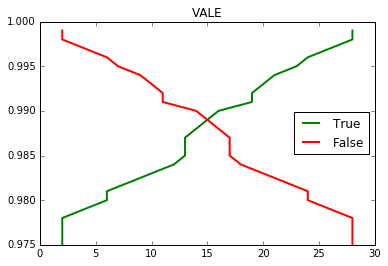

In [63]:
trueFalseBuyLowRatio('VALE', VALE_open, VALE_low, VALE_high, .975, .999, .001)

True Count [2, 2, 2, 2, 2, 3, 3, 3, 3, 5, 5, 6, 7, 10, 11, 13, 14, 16, 18, 18, 19, 21, 25, 26, 27]
False Count [28, 28, 28, 28, 28, 27, 27, 27, 27, 25, 25, 24, 23, 20, 19, 17, 16, 14, 12, 12, 11, 9, 5, 4, 3]


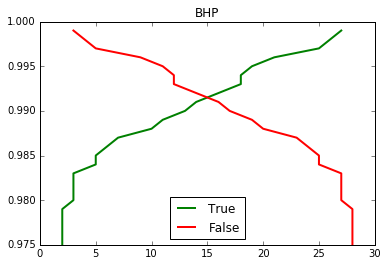

In [62]:
trueFalseBuyLowRatio('BHP', BHP_open, BHP_low, BHP_high, .975, .999, .001)

**Lets try some other Stocks**

In [4]:
def runSymbolHistoryReport(History, Symbol):
    SYM_open, SYM_close, SYM_high, SYM_low, SYM_volume, SYM_adjClose, SYM_dates = createFinanceArrays(History)
    trueFalseBuyLowRatio(Symbol, SYM_open, SYM_low, SYM_high, .975, .999, .001)

In [5]:
def buyReport(symbol, date_start, date_end):
    stock = Share(symbol)
    History = stock.get_historical(date_start, date_end)
    runSymbolHistoryReport( History, symbol)

True Count [10, 13, 14, 14, 15, 16, 16, 16, 17, 19, 19, 21, 22, 23, 24, 24, 24, 27, 27, 27, 27, 27, 27, 27, 27]
False Count [20, 17, 16, 16, 15, 14, 14, 14, 13, 11, 11, 9, 8, 7, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3]


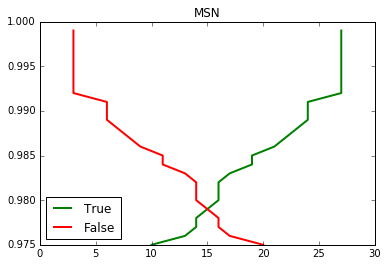

In [69]:
buyReport('MSN', '2011-02-11', '2011-03-25')

True Count [10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]
False Count [10, 10, 10, 10, 10, 10, 10, 10, 10, 8, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


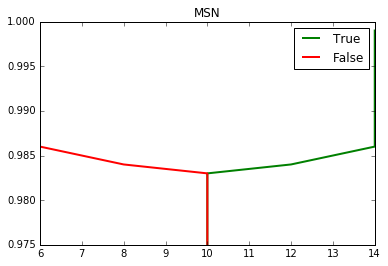

In [70]:
buyReport('MSN', '2016-07-01', '2016-07-30')

True Count [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 5, 6, 7, 8, 10, 10, 11, 13, 17, 18, 19]
False Count [20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 17, 15, 15, 14, 13, 12, 10, 10, 9, 7, 3, 2, 1]


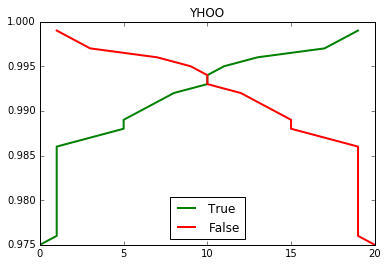

In [71]:
buyReport('YHOO', '2016-07-01', '2016-07-30')

True Count [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 5, 5, 7, 9, 9, 13, 13, 14, 18]
False Count [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 17, 15, 15, 13, 11, 11, 7, 7, 6, 2]


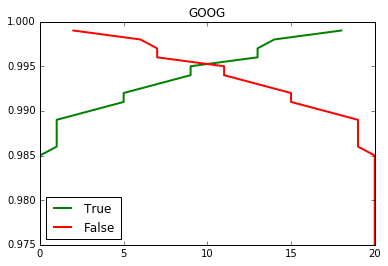

In [72]:
buyReport('GOOG', '2016-07-01', '2016-07-30')

True Count [0, 0, 1, 2, 2, 3, 3, 3, 3, 3, 4, 6, 6, 6, 6, 6, 7, 7, 7, 7, 12, 14, 16, 17, 19]
False Count [20, 20, 19, 18, 18, 17, 17, 17, 17, 17, 16, 14, 14, 14, 14, 14, 13, 13, 13, 13, 8, 6, 4, 3, 1]


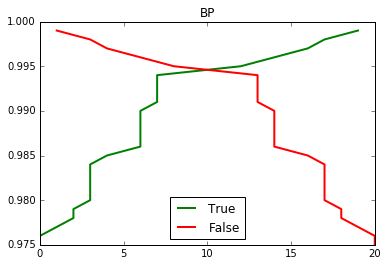

In [74]:
buyReport('BP', '2016-07-01', '2016-07-30')

True Count [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 4, 8, 10, 12, 15, 18]
False Count [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 17, 16, 12, 10, 8, 5, 2]


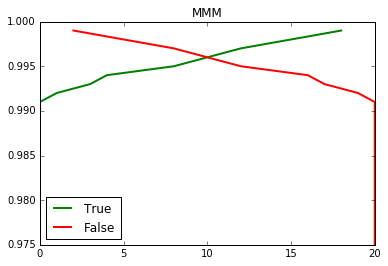

In [76]:
buyReport('MMM', '2016-07-01', '2016-07-30')

**Interesting Data**

True Count [0, 0, 0, 1, 1, 1, 1, 3, 4, 5, 5, 5, 5, 6, 7, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19]
False Count [20, 20, 20, 19, 19, 19, 19, 17, 16, 15, 15, 15, 15, 14, 13, 13, 12, 11, 10, 9, 8, 6, 5, 4, 1]


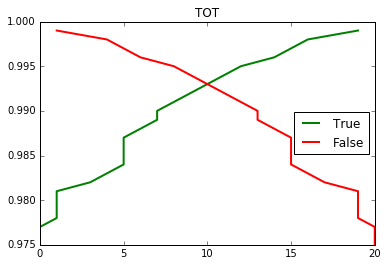

In [6]:
buyReport('TOT', '2016-07-01', '2016-07-30')

True Count [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 3, 3, 6, 8, 8, 9, 10, 10, 11, 14, 16, 17]
False Count [20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 18, 18, 18, 17, 17, 14, 12, 12, 11, 10, 10, 9, 6, 4, 3]


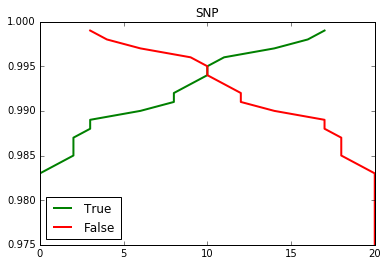

In [7]:
buyReport('SNP', '2016-07-01', '2016-07-30')

True Count [0, 0, 0, 0, 0, 0, 0, 1, 3, 5, 5, 9, 9, 10, 10, 10, 13, 13, 14, 15, 15, 17, 17, 17, 17]
False Count [20, 20, 20, 20, 20, 20, 20, 19, 17, 15, 15, 11, 11, 10, 10, 10, 7, 7, 6, 5, 5, 3, 3, 3, 3]


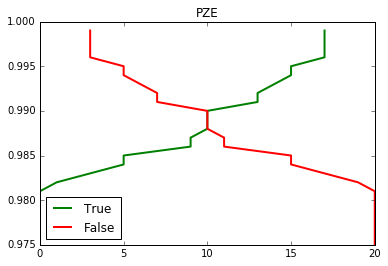

In [8]:
buyReport('PZE', '2016-07-01', '2016-07-30')

True Count [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 4, 5, 6, 9, 10, 12, 15, 18, 20, 20]
False Count [20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 18, 18, 18, 18, 16, 15, 14, 11, 10, 8, 5, 2, 0, 0]


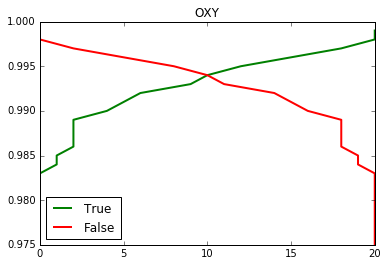

In [9]:
buyReport('OXY', '2016-07-01', '2016-07-30')

True Count [0, 0, 1, 2, 2, 3, 3, 3, 3, 3, 4, 6, 6, 6, 6, 6, 7, 7, 7, 7, 12, 14, 16, 17, 19]
False Count [20, 20, 19, 18, 18, 17, 17, 17, 17, 17, 16, 14, 14, 14, 14, 14, 13, 13, 13, 13, 8, 6, 4, 3, 1]


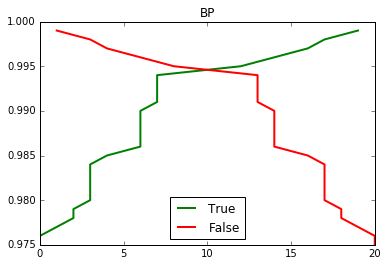

In [10]:
buyReport('BP', '2016-07-01', '2016-07-30')

True Count [1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 6, 7, 7, 8, 8, 9, 12, 15, 16, 17, 19]
False Count [19, 19, 19, 19, 19, 19, 18, 18, 17, 17, 17, 16, 15, 15, 14, 13, 13, 12, 12, 11, 8, 5, 4, 3, 1]


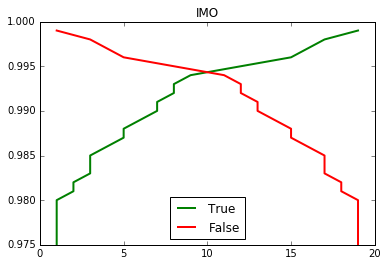

In [11]:
buyReport('IMO', '2016-07-01', '2016-07-30')

True Count [4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9]
False Count [16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 14, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11]


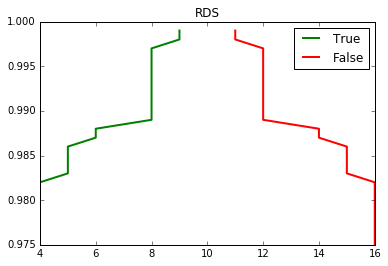

In [14]:
buyReport('RDS', '2016-07-01', '2016-07-30')

True Count [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 9, 11, 14, 15, 17, 18, 18, 19]
False Count [19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 16, 11, 9, 6, 5, 3, 2, 2, 1]


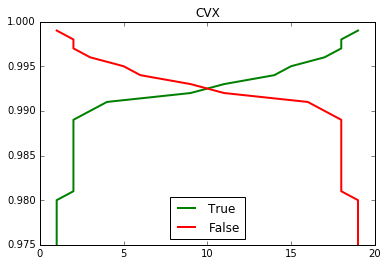

In [15]:
buyReport('CVX', '2016-07-01', '2016-07-30')

True Count [2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 5, 6, 6, 8, 8, 8, 9, 11, 11, 11, 13, 14, 14, 17]
False Count [18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 16, 15, 14, 14, 12, 12, 12, 11, 9, 9, 9, 7, 6, 6, 3]


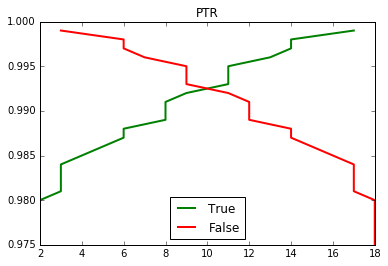

In [16]:
buyReport('PTR', '2016-07-01', '2016-07-30')

True Count [0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 4, 7, 8, 8, 9, 14, 18, 19, 19, 20]
False Count [20, 20, 20, 20, 19, 19, 19, 18, 17, 17, 17, 17, 17, 17, 17, 16, 13, 12, 12, 11, 6, 2, 1, 1, 0]


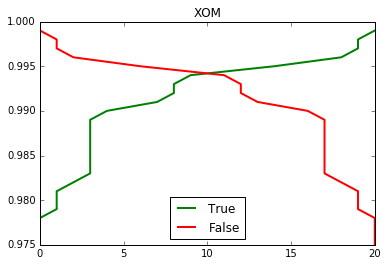

In [17]:
buyReport('XOM', '2016-07-01', '2016-07-30')

**I think the RDS Data set will need another look.  Along with this math.**

**#Crispy**